In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
results = pd.read_csv("results_linear_cifar100.csv", index_col=0)
results.head()
results.tail()

,epoch,num_parameters,dim,rank,training_duration,loss,accuracy,val_loss,val_accuracy
1645,46,1837100,500,-1,279.192936,3.657646,0.16792,3.992992,0.1094
1646,47,1837100,500,-1,279.192936,3.649599,0.16810,4.076960,0.1109
1647,48,1837100,500,-1,279.192936,3.645816,0.17052,3.881378,0.1320
1648,49,1837100,500,-1,279.192936,3.645896,0.16872,3.975405,0.1334
1649,50,1837100,500,-1,279.192936,3.638456,0.17328,4.020236,0.1162


In [43]:
avg_accs = pd.pivot_table(
    results,
    aggfunc=np.max,
    values="val_accuracy",
    index="dim",
    columns="rank"
)
avg_accs.style.format(precision=2).background_gradient(axis=None)

rank,-1,5,10,20,50,100,200,500
dim,,,,,,,,
10,0.15,0.08,0.09,nan,nan,nan,nan,nan
20,0.17,0.09,0.12,0.14,nan,nan,nan,nan
50,0.17,0.10,0.13,0.16,0.17,nan,nan,nan
100,0.16,0.11,0.15,0.16,0.17,0.16,nan,nan
200,0.15,0.11,0.15,0.16,0.17,0.16,0.16,nan
500,0.14,0.11,0.15,0.17,0.17,0.16,0.16,0.11


In [44]:
num_param = pd.pivot_table(
    results,
    values="num_parameters",
    index="dim",
    columns="rank"
)
num_param /= 1000
num_param.style.format(precision=0).background_gradient(axis=None)

rank,-1,5,10,20,50,100,200,500
dim,,,,,,,,
10,32,17,32,nan,nan,nan,nan,nan
20,64,18,33,65,nan,nan,nan,nan
50,161,21,37,70,166,nan,nan,nan
100,328,27,44,78,179,348,nan,nan
200,675,39,57,94,204,388,755,nan
500,1837,74,97,143,280,508,966,2337


In [45]:
acc_per_param = avg_accs / num_param
acc_per_param.style.format(precision=2).background_gradient(axis=None)

rank,-1,5,10,20,50,100,200,500
dim,,,,,,,,
10,0.00,0.00,0.00,nan,nan,nan,nan,nan
20,0.00,0.01,0.00,0.00,nan,nan,nan,nan
50,0.00,0.00,0.00,0.00,0.00,nan,nan,nan
100,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan
200,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan
500,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [51]:
def plot_metric(metric, dim, rank):
    values = results.loc[
        (results["dim"] == dim) & (results["rank"] == rank),
        ["epoch", metric]
    ].set_index("epoch").sort_index()
    plt.plot(values[20:], label=f"dim: {dim} rank: {rank}")
    return values

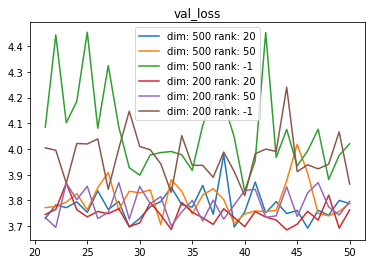

In [52]:
metric = "val_loss"
plot_metric(metric, 500, 20)
plot_metric(metric, 500, 50)
plot_metric(metric, 500, -1)
plot_metric(metric, 200, 20)
plot_metric(metric, 200, 50)
plot_metric(metric, 200, -1)
plt.title(metric)
plt.legend()
plt.show()